<a href="https://colab.research.google.com/github/Alisyed098/Capstone-Project-1--AirBnb-Booking-Analysis/blob/main/Capstone_Project_1_AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **AirBnb booking Analysis**
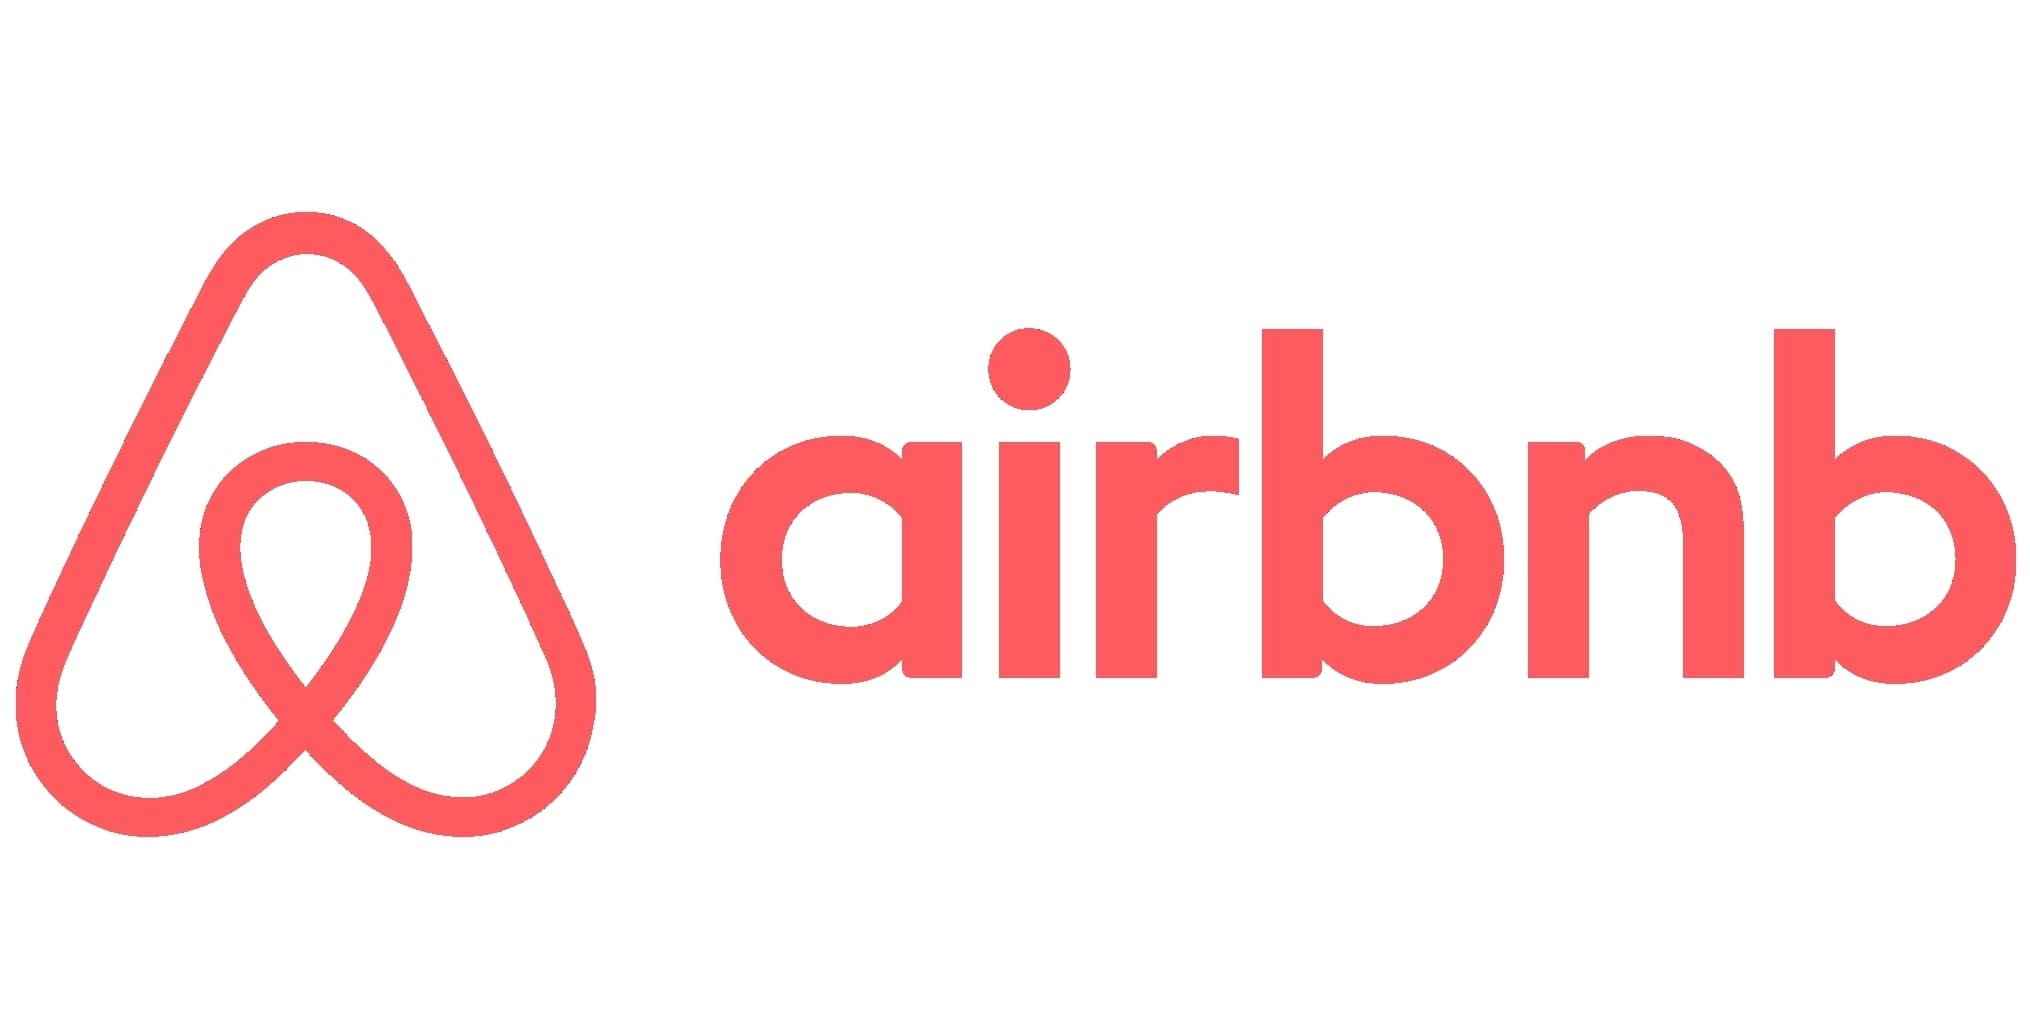



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Syed Junaid Ali
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

I just randomely picked up this dataset, don't have any idea about AirBnb, except some clues like it is a company which provide short or long homestays.It has only one dataset so i think it is easy to do EDA on it, but i want to know more about it then i started gatthering all possible information about AirBnb from google.After some research i find it interesting and do some random EDAs on it which looks good.Then i got my confidence to do it further. The obstacles that i faced during EDA is having lots of null values in last_review and review_per_month columns of our dataset which i fixed by using fillna() method and the second problem was the outliers in price column which i fixed by finding IQR(Interquartile Range).

# **GitHub Link -**

https://github.com/Alisyed098/Capstone-Project-1--AirBnb-Booking-Analysis?search=1

# **Problem Statement**


**Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as :

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

#### **Define Your Business Objective?**

* Which are the most expensive and cheepest locations to live in NYC ?
* What are the top most areas in NYC in terms of average price of Airbnb listings ?
* What are the price range of room types in different neighbourhood_group ?
* What are the average of nights in which people likes to stay in  each room type ?
* List top 10 reviewed listings in NYC ? How monthly reviews varies with room types in each neighbourhood groups?
* Find the top most reviewed hosts on the basis of number of reviews and reviews/month?
* Who is the most valuable host of NYC listed on AirBnb?
* Who is the most expensinve host in NYC ?
* Distribution of AirBnb listings accross neighbourhood groups in NYC.
* Distribution of rooms types accross NYC.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
from collections import Counter 
%matplotlib inline

### Dataset Loading

In [ ]:
#Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
df_AirNYC = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df_AirNYC.head().T

In [ ]:
df_AirNYC.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Rows count :" ,df_AirNYC.count(axis = 0)[0])
print("Columns count :" ,df_AirNYC.count(axis = 1)[0])

df_AirNYC.shape

**Observations :**

There are total 48895 rows and 16 column.

### Dataset Information

In [ ]:
# Dataset Info
df_AirNYC.info()

In [ ]:
df_AirNYC.describe().round(2)


**Observations :**


*   People stay 7 nights in a room on an average.
*   Average Price is 152.
*   Min of Price is 0 and max is 10000

It means that '**Price**' column are having many outliers, don't worry we can deal with it later.






#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count in Name Column.
duplicate_data = df_AirNYC.duplicated()
print(duplicate_data.sum())
df_AirNYC[duplicate_data]


In [ ]:
df_AirNYC.columns

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_null_values = df_AirNYC.isnull().sum().sort_values(ascending=False)
df_null_values

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14,7))
df_null_values.plot(kind = 'bar')
plt.title("Missing Values",fontweight = 'bold')


**Observations:**


*   There are four Columns which are having null values. 
*   '**name**' Column are  having 16 null values.
*   '**host_name**' Column are  having 21 null values.
*   '**last_review & reviews_per_month**' Both Columns are  having 10052 null values.







In [ ]:
Percentage = round(df_null_values*100/df_AirNYC.count()[0],2)
df_missing_count_per = pd.concat([df_null_values,Percentage],axis = 1)
df_missing_count_per.rename(columns = {0: 'Total',1:"Percentage"}, inplace = True)
df_missing_count_per

# **Dealing with null values.**

In [ ]:
# filling the null values.
df_AirNYC['host_name'].fillna('missing',inplace= True)
df_AirNYC['reviews_per_month'].fillna(0,inplace= True)
df_AirNYC['last_review'].fillna('not found',inplace= True)



In [ ]:
# checking for the null values in host_name and reviews_per_month.
df_AirNYC[['host_name','name','last_review','reviews_per_month']].isnull().sum()

### What did you know about your dataset?

As per the obsevations above we are having total 48895 rows and 16 columns in our dataset. People stay 7 nights in a room on an average. Average Price is $152. Min of Price is 0 and max is 10000. We have four Columns which are having null values such as '**name**' which are having 16 null values , '**host_name**' which are having 21 null values , '**last_review & reviews_per_month**' both are having 10052 null values.

We filled the null values of all the columns of dataset. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_AirNYC.columns

1) **column 1 : name**

In [ ]:
# Dataset Describe
df_AirNYC["name"].info()


In [ ]:
df_AirNYC['name']

In [ ]:
df_AirNYC[df_AirNYC['name'].isnull()].head()


* This columns describes the names of the property which host is trying to give on rent,so the nature of this column('name') is short and consize and this is required as this can draw an attention of customer.
* The question arises that how to fill the missing values in this column.we will explore further dataset and try to find out better options to fill the missing values.
* This feature can be important in model building like Recommender systems.
Of course there is no point in removing these cells although they are limited in numbers.

In [ ]:
#This code snippit will replace the nan values.
df_AirNYC['name'].fillna(df_AirNYC['room_type'],inplace=True)

We have replaced all NaN values of '**name**' column with '**room_type**' because **room_type** column is not having any null value and this will solve our purpose.

In [ ]:
#Lets check again for NaN values.
#Now there will be not any NaN values in name column.
df_AirNYC['name'].isnull().any()

In [ ]:
# lets create a function to remove stopwords.
def stop_words(df):
 stop_words = set(STOPWORDS)
 df['name'] = df['name'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
 

In [ ]:
text = stop_words(df_AirNYC)
text = " ".join(words for words in  df_AirNYC['name']) 

In [ ]:
#lets generate a wordcloud.
wordcloud = WordCloud(max_words=300, background_color="black").generate(text)
plt.figure(figsize=(8,5))
plt.figure(figsize=(12,8))

#Now have a look on wordcloud image below.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Now** we found the most frequent words.

In [ ]:
#lets seperate top 30 most commonly used words from the above wordcloud.
list_name = list(df_AirNYC['name'])
new_words = []
for new in list_name:
  new_words += new.lower().split()


In [ ]:
new_words

In [ ]:
#lets define a function to remove some unwanted words.
def words_remover(new_words) :
    new_words = pd.DataFrame(new_words,columns = ['Words'])
    filtered_words = ["&","1","2","-",")","(" ]
    new_words['dropping_words'] = new_words[new_words['Words'].isin(filtered_words)]
    filter_data = new_words[new_words['dropping_words'].isnull()]
    actual_rows = filter_data.drop(['dropping_words'],axis=1)
    actual_rows = actual_rows['Words'].squeeze()
    return actual_rows


In [ ]:
actual_rows = words_remover(new_words)

In [ ]:
#lets make new variable to store top 30 most commonly used words.
top30mostcommon = Counter(actual_rows).most_common()
top30mostcommon = top30mostcommon[0:30]

In [ ]:
#top 30 most commonly used words with there counts.
top30mostcommon = pd.DataFrame(top30mostcommon,columns = ['Words','Frequency'])
top30mostcommon

In [ ]:
# lets visualize top30 words.
plt.figure(figsize=(20,5))
bar_1= sns.barplot(x='Words',y='Frequency',data = top30mostcommon)
bar_1.set_title('Top 30 words' , fontweight = 'bold' )
bar_1.set_ylabel('Frequency of words',fontweight = 'bold' )
bar_1.set_xlabel('Words',fontweight = 'bold')
bar_1.set_xticklabels(bar_1.get_xticklabels(), rotation=60)

**Observation**

* The above observation shows us the top most commonly used 30 words and there frequency.
* These words can he helpfull in model buliding point of view.

### Check Unique Values for each variable.

**column 2 : host_id**


In [ ]:
# top 10 highest listing host_id.
max_hostid = df_AirNYC['host_id'].value_counts().head(10)
max_hostid

In [ ]:
# creating a dataframe with max host_id data.
df_maxhost_id = pd.DataFrame(max_hostid)
df_maxhost_id.reset_index(inplace = True)
df_maxhost_id.rename(columns = {'index':'Host_ID', 'host_id':'Listings_Count'},inplace = True)
df_maxhost_id

In [ ]:
# lets visualize the host_id listing.
plt.figure(figsize=(20,5))
bar_2= sns.barplot(x='Host_ID',y='Listings_Count',data = df_maxhost_id)
bar_2.set_title('Hosts with the highest listings in NYC' , fontweight = 'bold' )
bar_2.set_ylabel('Listings Count',fontweight = 'bold' )
bar_2.set_xlabel('Host ID',fontweight = 'bold')
bar_2.set_xticklabels(bar_2.get_xticklabels(), rotation=60)

The highest listed host_id is '**219517861**'	which is 327 times.

**column 3 : host_name**

In [ ]:
# Check Unique Values for host_name variable.
df_AirNYC['host_name'].nunique()

There are 11452 unique hosts/owners

**column 4 : neighbourhood_group**

In [ ]:
# Check Unique Values for neighbourhood_group variable.
df_AirNYC['neighbourhood_group'].unique()

In [ ]:
# analyzing the column neighbourhood_group.
all_neighbourhood_group=df_AirNYC['neighbourhood_group'].value_counts()
all_neighbourhood_group


In [ ]:
# store the data in a dataframe.
df_neighbourhood_group=pd.DataFrame(all_neighbourhood_group)
df_neighbourhood_group.reset_index(inplace=True)
df_neighbourhood_group.rename(columns={'index':'Neighbourhood_Group','neighbourhood_group':'Counts'},
                              inplace=True)
df_neighbourhood_group

In [ ]:
# lets visualize the count of neighbourhood_group.
plt.figure(figsize=(10,5))
bar_3= sns.barplot(x='Neighbourhood_Group',y='Counts',data = df_neighbourhood_group)
bar_3.set_title('Listings in each Neighbourhood Group' , fontweight = 'bold' )
bar_3.set_ylabel('Counts',fontweight = 'bold' )
bar_3.set_xlabel('Neighbourhood_Group',fontweight = 'bold')

In [ ]:
# also lets plot the listings in neighbourhood group with the help of pie chart.
plt.figure(figsize=(7,7))
plt.pie(list(df_AirNYC['neighbourhood_group'].value_counts()),labels=list(df_AirNYC['neighbourhood_group'].value_counts().keys()),autopct='%0.1f%%')

Manhattan has the most highest nunber of listings in entire NYC followed by Brooklyn Queens , Bronx and Stalen Island.

column 5 : neighbourhood

In [ ]:
# checking unique counts of neighbourhood.
neighbourhood_unique_count =  df_AirNYC['neighbourhood'].value_counts()
neighbourhood_unique_count

In [ ]:
# lets find top 10 neighbours and there counts in NYC.
top10neighbours = Counter(df_AirNYC['neighbourhood']).most_common()
top10neighbours = top10neighbours[0:10]
top10neighbours = pd.DataFrame(top10neighbours,columns = ['Neighbourhood' , 'Counts'])
top10neighbours

In [ ]:
# lets plot the count of neighbourhood.
plt.figure(figsize=(12,8))
bar_4 = sns.barplot(x = 'Neighbourhood',y =  'Counts',data = top10neighbours)
bar_4.set_title('Count of Neighbourhood',fontweight = 'bold')
bar_4.set_ylabel('Frequency',fontweight = 'bold')
bar_4.set_xlabel('Neighbourhood',fontweight = 'bold')
bar_4.set_xticklabels(bar_4.get_xticklabels(), rotation=60);

From the above graph we observe that '**Williamsburg & Bedford-Stuyvesant**' are having highest number of counts. People likes to stay in both at the most. 

**column 6 : room_type**

In [ ]:
# lets check the number of uniques in room_type.
df_AirNYC['room_type'].nunique()

In [ ]:
# visulaizing count of room_type with the help of count_plot .
plt.figure(figsize=(10,5))
bar_5 = sns.countplot(x='room_type',data = df_AirNYC)
bar_5.set_title('room_type counts', fontweight = 'bold')
bar_5.set_ylabel('frequency',fontweight = 'bold')
bar_5.set_xlabel('room_type',fontweight = 'bold')


Above bar graph shows the highest count for '**Entire home/apt**'which is the most preferable room type followed by '**Private room' & 'Shared room**'.

## 3. ***Data Wrangling*** 

**column 7 : 'price'**

In [ ]:
# let find how many rows are having price as 0.
df_AirNYC[df_AirNYC['price']==0]['name'].value_counts().sum()

In [ ]:
# checking for outliers in 'price' column.
plt.figure(figsize=(10,5))
box_1 = df_AirNYC.boxplot(column = ['price'])

I use boxplot to identify the outliers and seen huge amount of outliers in price column.

In [ ]:
# lets try to remove these outliers by IQR approach.
Q1 = df_AirNYC.quantile(0.25)
Q3 = df_AirNYC.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# lets define function to find lower & upper bound values.
def outlier_remover(dfcol):
 sorted(dfcol)
 Q1,Q3 = np.percentile(dfcol , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
# applying a function on price column.
lower_bound,upper_bound = outlier_remover(df_AirNYC.price)

In [ ]:
# checking rows having outliers.
df_AirNYC[(df_AirNYC.price < lower_bound) | (df_AirNYC.price > upper_bound)]

In [ ]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
df_AirNYC_new = df_AirNYC[(df_AirNYC.price > lower_bound) & (df_AirNYC.price < upper_bound)]
df_AirNYC_new

In [ ]:
# lets see the price column without outliers with the help of boxplot.
plt.figure(figsize=(10,5))
box_2 = df_AirNYC_new.boxplot(column = ['price'])

**column 8 : last_review**

In [ ]:
# dropping the column 'last_review'.
df_AirNYC_new = df_AirNYC_new.drop(['last_review'],axis = 1)

We have so many null values in last_review column and i think it is not that important for our analysis.

In [ ]:
# checking the dataframe after removing the last_ review column.
df_AirNYC_new

**column 9 : minimum_nights**

In [ ]:
# checking number of uniques in 'minimum_nights' column.
df_AirNYC_new['minimum_nights'].nunique()

There are 105 unique values in **'minimum_nights'** column. We can do some more analysis on it later with 'room_type'.

### What all manipulations have you done and insights you found?

By doing some manipulations , I figured out that there was huge amount of outliers in **'price'** column which was removed by using IQR approach.

Also drop the column **'last_review'** from the dataset because of having many null values and it was not that much need for analysis point of view.

Columns - **'host_name'** , **'neighbourhood_group'**,**'neighbourhood'** and **'room_type'** are catagorical variables.

While **'id'** , **'latitude'** , **'longitude'** , **'price'** , **'minimum_nights'** , **'number_of_reviews'** , **'last_review'** ,  **'reviews_per_month'** , **'calculated_host_listings_count'** ,  **'availability_365'** are numerical variables.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# checking the correlation among the columns.
corr_col = df_AirNYC_new.corr()
corr_col

In [ ]:
# lets understand the correlation between the variables by using correlation matrix.
f, corr_1 = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_col, vmax=.8, square=True, annot= True);

##### 1. Why did you pick the specific chart?

By using heatmap we can see the correlation between different variables that can affect a airbnb listing.

##### 2. What is/are the insight(s) found from the chart?

We found positive correlation among host_id to reveiws_per_month & availability_365.
Also there is noticable positive correlation between min_nights to no_of_listings_count & availability_365. Price also shows some positive correlation with host_listings_count.
no_of_reviews is positively correlated to availability_365,
showing some negative correlation between price and longitude.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So far , we just figured out correlations among the varialbles. 

Yes, we can also find out the insights by plotting all the correlated varialbles further.

# Which are the most expensive and cheepest locations to live in NYC ?

In [ ]:
# first lets check the distribution of price in each neighbourhood_group.
plt.figure(figsize=(10,8))
viol_1= sns.violinplot(x='neighbourhood_group',y='price',data= df_AirNYC_new)

##### 1. Why did you pick the specific chart?

By using the violinplot we can easily check the distributions of price in each neighbourhood_group.

##### 2. What is/are the insight(s) found from the chart?

Manhattan is the most costliest place to live in, having price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

Queens, Staten Island are on the same page with price on listings.

# **Average price of rooms in each neighbourhood group.**

In [ ]:
# lets look for the average price of rooms in each neighbourhood_group.
plt.figure(figsize= (10,8))
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_AirNYC_new, estimator= 'mean')

##### 1. Why did you pick the specific chart?

I am using pointplot so that i can see the average price rooms in each neighbourhood_group.

##### 2. What is/are the insight(s) found from the chart?

We can see that Manhattan has the highest(the costliest) average of price ranging to ~150dollars/day followed by Brooklyn
Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From my point of view It is more profitable to add hosts who have more properties in Manhattan, however manhattan is the most expensive location with higher property tax as well but people likes to stay in mahattan as it is the economical and cultural hub. 

In [ ]:
# lets check the total price per neighbourhood group.
df_AirNYC_new.groupby('neighbourhood_group')['price'].sum()

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(list(df_AirNYC_new.groupby('neighbourhood_group')['price'].sum()),labels=list(df_AirNYC_new.groupby('neighbourhood_group')['price'].sum().keys()),autopct='%0.1f%%')

# **What are the top most areas in NYC in terms of average price of Airbnb listings ?**

In [ ]:
# group_by neighbourhood by price.
df_grpby_neighbourhood = df_AirNYC.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
df_grpby_neighbourhood

In [ ]:
top_neighbourhood= df_grpby_neighbourhood.loc[df_grpby_neighbourhood.groupby('neighbourhood_group')['price'].idxmax()].sort_values('price',ascending=False)
top_neighbourhood

In [ ]:
plt.figure(figsize=(10,8))
top_neighbourhood.plot.bar(x='neighbourhood', rot=60, title='Top most expensive Neighbourhoods in each neighbourhood group in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

##### 1. Why did you pick the specific chart?

Bar chart shows the the top neighbourhoods in NYC with respect to average price/day of Airbnb listings.

##### 2. What is/are the insight(s) found from the chart?

Among the top neighbourhoods in each neighbourhood groups,Fort Wadsworth from Staten Island is on the top followed by Sea Gate origins from Brooklyn,
Riverdale from Bronx , Tribeca from Manhattan and Neponsit from Queens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

I think AirBnb should have to reduce the price of Fort Wadsworth in Stalen Island.It could be good for business point if view.

# **What are the price range of room types in different neighbourhood_group?**

In [ ]:
#room_type vs price
cat_1 = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_AirNYC_new, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(cat_1.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True))

##### 1. Why did you pick the specific chart?

We use catplot because we have to show several visual presentations.

##### 2. What is/are the insight(s) found from the chart?

Looks like a property with Entire home/apt as room_type having the highest price range at NYC followed by private rooms.

Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night. And it's obvious being the most expensive place to live in!

# **What are the average number of nights in which people likes to stay in  each room type?**

In [ ]:
df_AirNYC.groupby('room_type')['minimum_nights'].mean().plot(kind='bar',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')

##### 1. Why did you pick the specific chart?

Number of minimum stays in each room type looks good on bar chart.

##### 2. What is/are the insight(s) found from the chart?

Looking at these it clearly indicates that people mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed in shared room where average stay is 6-7 nights.

In this criteria we found private rooms is on least where average stay is 5-6 nights.

# **List top 10 reviewed listings in NYC ? How monthly reviews varies with room types in each neighbourhood groups?**

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df_AirNYC.nlargest(10,'reviews_per_month')
top_10 = top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]
top_10

In [ ]:
plt.figure(figsize=(15,6))
bar_12= sns.barplot(data= top10_reviewed_listings, x = 'name', y= 'reviews_per_month', hue = 'neighbourhood_group')
bar_12.set_xticklabels(bar_12.get_xticklabels(), rotation=90)

So, these are the listings which are having highest number of reviews, the highest being: 'Enjoy great views City in our Deluxe Room!' with 58 reviews/month followed by 'Great Room heart of Times Square!' with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.

In [ ]:
# how monthly reviews varies with room types in each neighbourhood groups!
f,strp_1 = plt.subplots(figsize=(10,8))
strp_1= sns.stripplot(x='room_type' , y='reviews_per_month' , hue='neighbourhood_group' , dodge=True , data=df_AirNYC_new , palette='Set2')
strp_1.set_title('Most Reviewed room_types in each Neighbourhood Groups')

##### 1. Why did you pick the specific chart?

We use stripplot to visualise the distribution of reviews among the roomtypes in each neughbourhood group.

##### 2. What is/are the insight(s) found from the chart?

We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Queens in the chase.

Manhattan & Queens got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

# **Find the top most reviewed hosts on the basis of number of reviews and reviews/month?**

In [ ]:
df_AirNYC.columns

In [ ]:
df_no_reviews = top10_reviewed_listings.groupby(['host_id','host_name'])['number_of_reviews'].sum()[:5]
df_no_reviews = df_no_reviews.reset_index().sort_values(by='number_of_reviews',ascending=False)
df_no_reviews.plot(x='host_name',y='number_of_reviews',kind='bar',color='y')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 5 hosts with highest number of reviews')

Nalicia is the host who got more than 1000 number of reviews which is highest in NYC followed by Danielle , Brent , Lakshmee and Louman.

In [ ]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
df_reviews = top10_reviewed_listings.groupby(['host_id','host_name'])['reviews_per_month'].mean()[:5]
df_reviews = df_reviews.reset_index().sort_values(by='reviews_per_month',ascending=False)


In [ ]:
df_reviews.plot(x='host_name',y='reviews_per_month',kind='bar',color='y')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 5 Reviews received by hosts per month')

Louman is the most reviewed host with more than 20 reviews/month on an average.

# **Who is the most valuable host of NYC listed on AirBnb?**

In [ ]:
host_with_most_listings= df_AirNYC.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

So, Sonder(NYC) leads the most valuable host in NYC with around 327 properties listed followed by Blueground and Michael.

Also, all 3 of them has their listings on Manhattan.

# **hosts with most listings in each neighbourhood group.**

In [ ]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

Sonder (NYC), Michael, Kazuya, Vie and and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

# Who is the most expensinve host in NYC ?

In [ ]:
# most expensive host before removing outliers.
df_exphost= df_AirNYC.groupby(['host_id','host_name','neighbourhood_group',])['price'].mean().sort_values(ascending=False).reset_index()
df_exphost

Erin, Jelena and Kathrine are the most expensive host in entire NYC before removing outliers. 

In [ ]:
# most expensive host in each neighbourhood_group before removing outliers.
df_expenhost = df_exphost.loc[df_exphost.groupby('neighbourhood_group')['price'].idxmax()].sort_values('price',ascending= False)
df_expenhost

In [ ]:
bar_exphost = sns.barplot(data= df_expenhost,x='host_name',y='price',hue= 'neighbourhood_group')
bar_exphost.set(title= 'Most Expensive Host before removing outliers')

Erin in Brooklyn , Jelena in Manhattan and Kathrine in Queens are the host who has the same most expensive average price of 10000 USD/night in NYC before removing outliers followed by Alissa in Stalen Island and Kathy in Bronx.

In [ ]:
# most expensive host after removing outliers.
df_exphost_new= df_AirNYC_new.groupby(['host_id','host_name','neighbourhood_group',])['price'].mean().sort_values(ascending=False).reset_index()
df_exphost_new

In [ ]:
# most expensive host in each neighbourhood_group after removing outliers.
df_expenhost_new = df_exphost_new.loc[df_exphost_new.groupby('neighbourhood_group')['price'].idxmax()].sort_values('price',ascending= False)
df_expenhost_new

In [ ]:
bar_exphost_new = sns.barplot(data= df_expenhost_new,x='host_name',y='price',hue= 'neighbourhood_group')
bar_exphost_new.set(title= 'Most Expensive Host after removing outliers')

Cullen in Brooklyn and Mel in Manhattan are the host who have the most expensive average price of 333 USD/night in NYC after removing outliers.

# **Room_types and their relation with availability in different neighbourhood groups!**

In [ ]:
f,box_3 = plt.subplots(figsize=(15,8))
box_3 = sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_AirNYC,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

##### 1. Why did you pick the specific chart?

We pick boxplot to see the availablity of room in each neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

Looking at the above categorical box plot we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

My recommendation is to increase the availability of listings in both manhattan and brooklyn should be good for the company's image.

# **Distribution of AirBnb listings accross neighbourhood groups in NYC.**

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df_AirNYC, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Distribution of AirBnb listings across neighbourhood groups in NYC')


# **Distribution of rooms types accross NYC.**



In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
scat_1= sns.scatterplot(data = df_AirNYC ,x=df_AirNYC.longitude, y=df_AirNYC.latitude,hue=df_AirNYC.room_type,palette='muted')
scat_1.set_title('Distribution of type of rooms across NYC')

##### 1. Why did you pick the specific chart?

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

##### 2. What is/are the insight(s) found from the chart?

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

#  Chart - 15 - Pair Plot 

In [ ]:
sns.pairplot(data = df_AirNYC_new,hue='neighbourhood_group',diag_kind='hist')

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

* If i am the part of the team in ArBnb. I suggest to add hosts who have more properties in manhattan because it is the economical and cultural hub of NYC people likes to stay more than other cities. 
* I think AirBnb should have to reduce the price of Fort Wadsworth in Stalen Island.It could be good for business point if view.
* My recommendation is to increase the availability of listings in both manhattan and brooklyn should be good for the company's image.

# **Conclusion**

From all the analysis we have done above to the dataset gives us a fantastic understanding of AirBnb's business in New York city. Manhattan is the most demanding and expensinve location in NYC followed by Brooklyn, Queens,Bronx and Stalen Island.
Loauan is the most reviewed host in entire NYC.
Sonder(NYC) is the most valuable host who owns the maximum number of listings in NYC.
Manhattan is the most reviewed listing per month.

Concluding with the statement which i observed that The Manhattan is the most valuable location in all formats for AirBnb.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***